In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras 
import librosa
import os
import struct
import IPython.display as ipd
from scipy.io import wavfile as wav
import librosa.display
from keras.utils import to_categorical
from keras.layers import Conv2D,Dense,Activation,Dropout,MaxPooling2D,BatchNormalization,Flatten,Add
from keras.models import Sequential

In [2]:
df=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [3]:
df.tail()

,slice_file_name,fsID,start,end,salience,fold,classID,class
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn
8731,99812-1-6-0.wav,99812,332.289233,334.821332,2,7,1,car_horn


In [4]:
df.shape

(8732, 8)

In [5]:
df['class'].value_counts()

jackhammer          1000
children_playing    1000
engine_idling       1000
dog_bark            1000
drilling            1000
air_conditioner     1000
street_music        1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [6]:
#Car_horn and Gun_shot are relatively less than other classes so we can do augmentation of these  2 classes

In [7]:
#Fold wise Class Distribution

In [8]:
classes=[]
for i in range(1,11):
    classes.append(df[df.fold==i]['class'].value_counts())
classes_df=pd.DataFrame(classes) 
classes_df=classes_df.reset_index()
classes_df['index']=['fold'+ str(t) for t in range(1,11)]
classes_df


,index,jackhammer,dog_bark,street_music,drilling,air_conditioner,children_playing,engine_idling,siren,car_horn,gun_shot
0,fold1,120,100,100,100,100,100,96,86,36,35
1,fold2,120,100,100,100,100,100,100,91,42,35
2,fold3,120,100,100,100,100,100,107,119,43,36
3,fold4,120,100,100,100,100,100,107,166,59,38
4,fold5,120,100,100,100,100,100,107,71,98,40
5,fold6,68,100,100,100,100,100,107,74,28,46
6,fold7,76,100,100,100,100,100,106,77,28,51
7,fold8,78,100,100,100,100,100,88,80,30,30
8,fold9,82,100,100,100,100,100,89,82,32,31
9,fold10,96,100,100,100,100,100,93,83,33,32


In [9]:
def path_class(filename):   
    excerpt = df[df['slice_file_name'] == filename]

    path_name = os.path.join('audio','fold'+str(excerpt.fold.values[0]), filename)

    return path_name, excerpt['classID'].values[0]



def wav_plotter(full_path, class_label):   

    sample_rate, wav_sample = wav.read(full_path)

    wave_file = open(full_path,"rb")

    riff_fmt = wave_file.read(36)

    bit_depth_string = riff_fmt[-2:]

    bit_depth = struct.unpack("H",bit_depth_string)[0]

    print('sampling rate: ',sample_rate,'Hz')

    print('bit depth: ',bit_depth)

    print('number of channels: ',wav_sample.shape[1])

    print('duration: ',wav_sample.shape[0]/sample_rate,' second')

    print('number of samples: ',len(wav_sample))

    print('class: ',class_label)

    plt.figure(figsize=(12, 4))

    plt.plot(wav_sample) 

    return ipd.Audio(full_path)

In [10]:
#Sampling rate-No. of samples per second
#Bit depth-A sample can take any value from 1 to 2^no. of bits

sampling rate:  24000 Hz
bit depth:  16
number of channels:  2
duration:  4.0  second
number of samples:  96000
class:  9


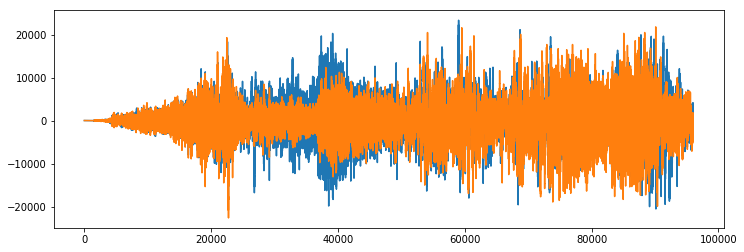

In [11]:
fullpath, label = path_class('77766-9-0-0.wav')
wav_plotter(fullpath,label)

sampling rate:  44100 Hz
bit depth:  16
number of channels:  2
duration:  0.31755102040816324  second
number of samples:  14004
class:  3


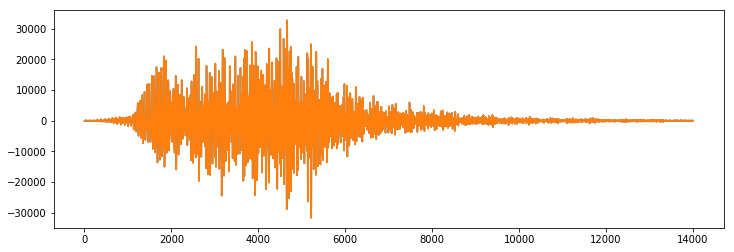

In [12]:
fullpath,label=path_class('100032-3-0-0.wav')
wav_plotter(fullpath,label)

In [13]:
#As above some sound clips are of much short durations ,so select those which is of atleast 3 seconds

In [14]:
new_df=df[['slice_file_name','fold','classID','class']][df['end']-df['start']>=3]
new_df.shape

(7468, 4)

In [15]:
new_df.head()

,slice_file_name,fold,classID,class
1,100263-2-0-117.wav,5,2,children_playing
2,100263-2-0-121.wav,5,2,children_playing
3,100263-2-0-126.wav,5,2,children_playing
4,100263-2-0-137.wav,5,2,children_playing
5,100263-2-0-143.wav,5,2,children_playing


In [16]:
new_df.tail()

,slice_file_name,fold,classID,class
8724,99812-1-0-1.wav,7,1,car_horn
8725,99812-1-0-2.wav,7,1,car_horn
8726,99812-1-1-0.wav,7,1,car_horn
8727,99812-1-2-0.wav,7,1,car_horn
8729,99812-1-4-0.wav,7,1,car_horn


sampling rate:  44100 Hz
bit depth:  16
number of channels:  2
duration:  4.0  second
number of samples:  176400
class:  2


'audio\\fold5\\100263-2-0-117.wav'

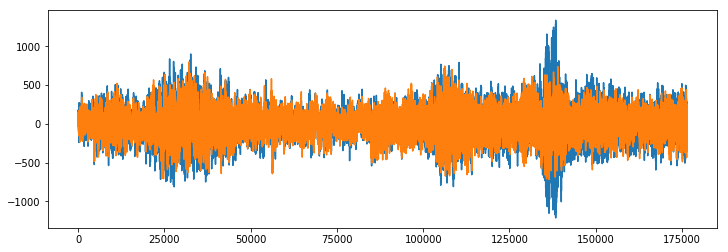

In [17]:
fullpath,label=path_class('100263-2-0-117.wav')
wav_plotter(fullpath,label)
fullpath

In [18]:
#Spectogram  of children playing

In [20]:
y,sampling_rate=librosa.load(fullpath,duration=2.95)
spect=librosa.feature.melspectrogram(y=y,sr=sampling_rate)

In [21]:
spect.shape

(128, 128)

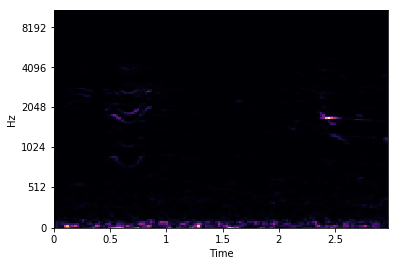

In [22]:
librosa.display.specshow(spect,y_axis='mel',x_axis='time')

In [23]:
new_df['path']='fold'+new_df['fold'].astype('str') + '/' + new_df['slice_file_name'].astype('str')
new_df['path'].head()

1    fold5/100263-2-0-117.wav
2    fold5/100263-2-0-121.wav
3    fold5/100263-2-0-126.wav
4    fold5/100263-2-0-137.wav
5    fold5/100263-2-0-143.wav
Name: path, dtype: object

In [24]:
final=[]
for row in new_df.itertuples():
    y, sr = librosa.load('UrbanSound8K/audio/' + str(row.path), duration=2.95) 
    spect=librosa.feature.melspectrogram(y=y,sr=sr)
    if spect.shape!=(128,128):continue
    final.append((spect,label))  
    

In [25]:
final

[(array([[1.97232777e-02, 4.10405620e-02, 1.85391236e-02, ...,
          8.54628280e-03, 3.05073936e-03, 2.13235504e-03],
         [2.28243613e-02, 3.67664343e-02, 2.02447544e-02, ...,
          2.00341754e-02, 1.57605698e-02, 8.32004607e-03],
         [1.81571245e-02, 3.09141526e-02, 2.68049290e-02, ...,
          1.60504151e-02, 1.70886679e-02, 7.05816971e-03],
         ...,
         [2.80420254e-06, 2.57283594e-06, 3.44760310e-06, ...,
          6.09773117e-06, 1.14943787e-05, 1.68798071e-05],
         [1.49856465e-06, 1.21688662e-06, 2.01539552e-06, ...,
          7.52622397e-07, 1.59346706e-06, 2.37687946e-06],
         [9.50988883e-07, 2.95931641e-07, 7.46052994e-08, ...,
          4.43219395e-08, 8.16509585e-08, 2.02136012e-07]]), 2),
 (array([[2.78938635e-03, 1.59733258e-02, 5.66013341e-02, ...,
          2.79803260e-02, 2.23237135e-02, 3.65412600e-02],
         [1.27243505e-02, 5.95912507e-02, 8.45157192e-02, ...,
          3.17603669e-02, 4.28358030e-02, 8.92363139e-02],
    

In [26]:
len(final)

7467

In [27]:
dataset=final
np.random.shuffle(dataset)

In [28]:
train=dataset[:6000]
test=dataset[6000:]
X_train,y_train=zip(*train)
X_test,y_test=zip(*test)

In [35]:
# Reshape for CNN Model
# Like image transform into (height,width,number of channels)

In [37]:
X_train = np.array([x.reshape( (128, 128, 1) ) for x in X_train])
X_test = np.array([x.reshape( (128, 128, 1) ) for x in X_test])


In [38]:
#One hot encoding for output

In [39]:
y_train=np.array(to_categorical(y_train,10))
y_test=np.array(to_categorical(y_test,10))

In [42]:
#Now it's time to build our model

In [56]:
model = Sequential()
input_shape=(128, 128, 1)

model.add(Conv2D(32, (5, 5), strides=(1, 1), input_shape=input_shape))
model.add(MaxPooling2D((2, 2))
model.add(Activation('relu'))

model.add(Conv2D(32, (5, 5)))
model.add(MaxPooling2D((2, 2))
model.add(Activation('relu'))

model.add(Conv2D(32, (5, 5)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate=0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(10))
model.add(Activation('softmax'))
          

SyntaxError: invalid syntax (<ipython-input-56-8d0ed929ab4e>, line 6)

In [ ]:
model.Add(Conv2D(32,(5,5),strides=(1,1),input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D((2,2))
model.add(Conv2D(32,(5,5),strides=(1,1),input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D((2,2))
model.add(Flatten())
model.add(Dropout(0.5))  
model.add(Dense(64,activation='relu')) 
model.add(Dropout(0.5))          
model.add(Dense(10,activation='softmax'))  

In [53]:
model.compile(optimizer='Adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [54]:
model.fit(X_train,y_train,epochs=20,batch_size=64,validation_data=(X_test,y_test),verbose=2)

Train on 6000 samples, validate on 1467 samples
Epoch 1/20
 - 221s - loss: 0.0587 - acc: 0.9930 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 2/20
 - 216s - loss: 2.2073e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 3/20
 - 224s - loss: 2.9189e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 4/20
 - 228s - loss: 4.6345e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5/20
 - 232s - loss: 1.5729e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6/20
 - 230s - loss: 1.9320e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7/20
 - 227s - loss: 2.3081e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8/20
 - 229s - loss: 1.2440e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9/20
 - 217s - loss: 1.9516e-06 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 10/20
 - 218s - loss: 1.2645e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 11/20
 - 218s - los

In [55]:
model.evaluate(X_test,y_test)

1467/1467 [==============================] - 12s 8ms/step


[1.1920928955078125e-07, 1.0]